Several studies of planetary phase curves (e.g. Armstrong et al. 2016) have used a Lambertian model instead of the sinusoidal phase curve we used in Jackson et al. (2012). I'm curious to see how different the curves are and whether I could really tell them apart.

In [1]:
%matplotlib inline
#%load_ext autoreload
#%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from lightkurve import KeplerLightCurveFile

from BEER_curve import BEER_curve
from BEER_curve.utils import median_boxcar_filter, bindata

1.2246467991473532e-16
1000


(-0.0001, 0.0001)

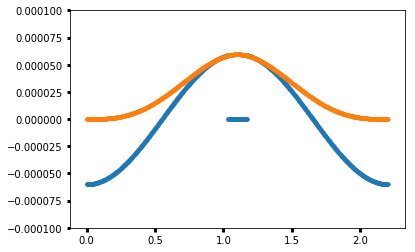

In [29]:
def Lambertian_phase_curve(BC):
    b = BC.params['b']
    a = BC.params['a']
    Aplanet = BC.params['Aplanet']
    
    inc = np.arccos(b/a)
    phi = BC._calc_phi()
    
    cos_z = -np.sin(inc)*np.cos(2*np.pi*phi)
    z = np.arccos(cos_z)
    sin_z = np.sin(z)
   
    return Aplanet/np.pi*(sin_z + (np.pi - z)*cos_z)
    
# Just checking that Lambert really does go to zero at phi = 0
inc = np.pi/2.
phi = 0.
    
cos_z = -np.sin(inc)*np.cos(2*np.pi*phi)
z = np.arccos(cos_z)
sin_z = np.sin(z)

print(sin_z + (np.pi - z)*cos_z)

params = {
    "per": 2.204733,
    "a": 4.15,
    "T0": 0.,
    "p": 0.,
    "linLimb" : 0.314709,
    "quadLimb" : 0.312125,
    "b": 0.499,
    "Aellip": 0.,
    "Abeam": 0.,
    "F0": 0.,
    "Aplanet": 60.e-6,
    "phase_shift": 0.
}

time = np.linspace(0, 2*params['per'], 1000)

BC = BEER_curve(time, params)
y = BC.all_signals()
lamb = Lambertian_phase_curve(BC)
print(len(lamb))

plt.scatter(time % params['per'], y, marker='.')
plt.scatter(time % params['per'], lamb, marker='.')
plt.ylim([-0.0001, 0.0001])

#Definitely different. However, no way to have a nightside flux using Lambert, right?

(0, 6e-05)

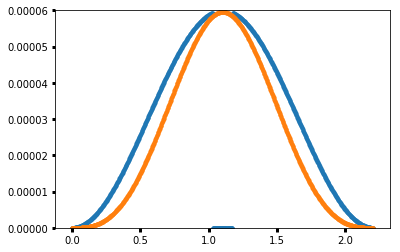

In [30]:
params = {
    "per": 2.204733,
    "a": 4.15,
    "T0": 0.,
    "p": 0.,
    "linLimb" : 0.314709,
    "quadLimb" : 0.312125,
    "b": 0.499,
    "Aellip": 0.,
    "Abeam": 0.,
    "F0": 30e-6,
    "Aplanet": 30e-6,
    "phase_shift": 0.
}

time = np.linspace(0, 2*params['per'], 1000)

BC = BEER_curve(time, params)
y = BC.all_signals()

BC.params['Aplanet'] = 60e-6
lamb = Lambertian_phase_curve(BC)
plt.scatter(time % params['per'], y, marker='.')
plt.scatter(time % params['per'], lamb, marker='.')
plt.ylim([0, 60e-6])

# Honestly, I doubt you could tell the difference between these two curves,
# and the sinusoid at least has the option for nightside flux.

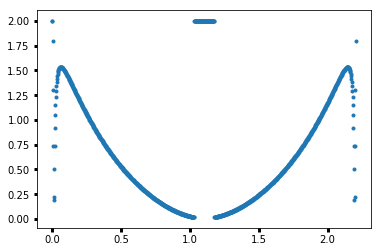

In [31]:
plt.scatter(time % params['per'], 2.*np.abs(y - lamb)/(y + lamb), marker='.')